In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df.rename({"Taxable.Income":"Taxableincome"},axis=1,inplace=True)

In [5]:
from sklearn.preprocessing  import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status']) 

In [6]:
df['Urban']= label_encoder.fit_transform(df['Urban']) 

In [7]:
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 

In [8]:
df.tail()

,Undergrad,Marital.Status,Taxableincome,City.Population,Work.Experience,Urban
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0
599,0,0,96519,158137,16,0


In [9]:
x=df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [10]:
risk=df[["Taxableincome"]]<30000
risk

,Taxableincome
0,False
1,False
2,False
3,False
4,False
...,...
595,False
596,False
597,False
598,False


In [11]:
df['risk']=risk
df
y=df["risk"]
y

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: risk, Length: 600, dtype: bool

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

* Entropy Criteria

In [13]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

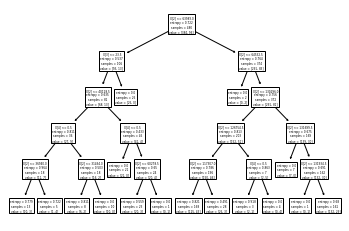

In [14]:
tree.plot_tree(model);

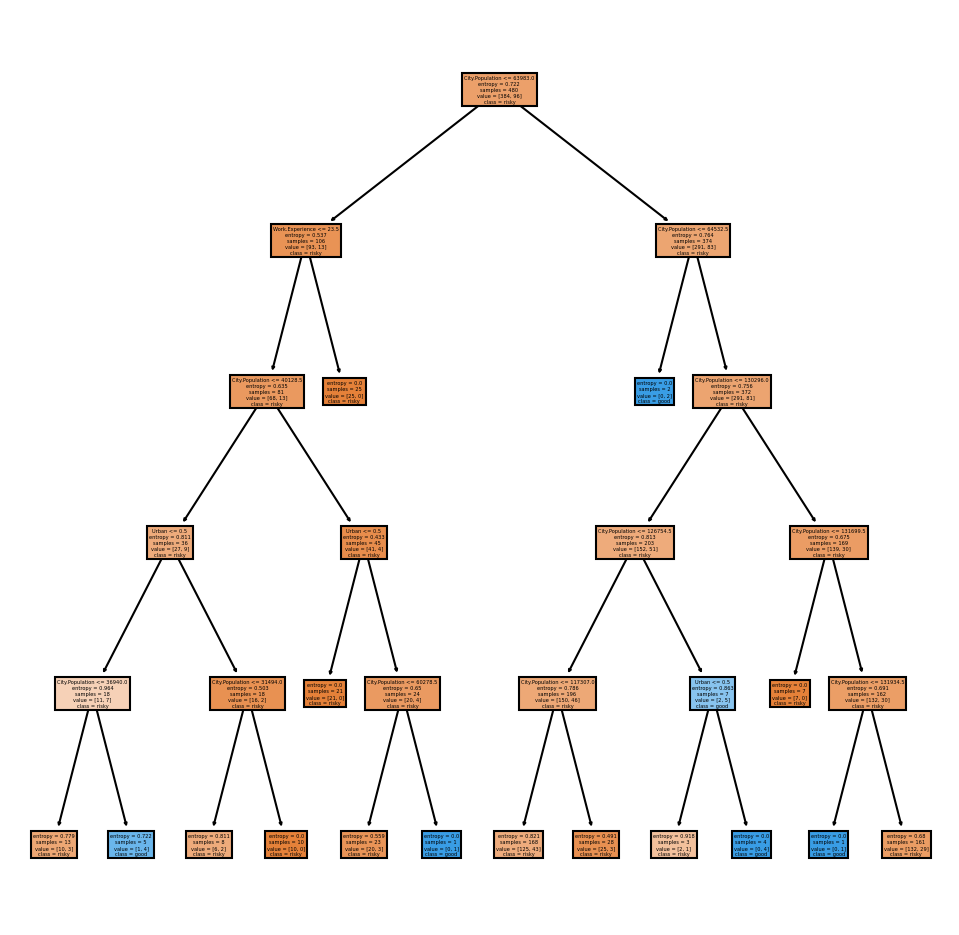

In [15]:
import matplotlib.pyplot as plt
fn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
cn=["risky","good"]
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=150)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [16]:
preds=model.predict(x_test)
preds

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
model.feature_importances_

array([0.        , 0.        , 0.68932971, 0.10975154, 0.20091875])

In [18]:
fn=("Undergrad","Marital.Status","City.Population","Work.Experience","Urban")
feature= pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature

City.Population    0.689330
Urban              0.200919
Work.Experience    0.109752
Marital.Status     0.000000
Undergrad          0.000000
dtype: float64

In [19]:
preds= model.predict(x_test)
pd.Series(preds).value_counts()

False    117
True       3
dtype: int64

In [20]:
pd.crosstab(preds,y_test)

risk,False,True
row_0,,
False,91,26
True,1,2


In [21]:
np.mean(preds==y_test)

0.775

* CART / GINI INDEX

In [22]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
pred_gini=model_gini.predict(x_test)

In [24]:
model_gini.feature_importances_

array([0.        , 0.        , 0.94815922, 0.        , 0.05184078])

In [25]:
np.mean(pred_gini==y_test)

0.7583333333333333

* REGRESSION MODEL

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
model_reg= DecisionTreeRegressor()
model_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
pred_reg=model_reg.predict(x_test)

In [29]:
np.mean(pred_reg==y_test)

0.6583333333333333